# Exponential and Power Law Models 

### In this lesson we will talk a bit about exponential and power law models.  
### These are models that fit functions to data that are widely used to describe psychological data in the perception. 
### In COGS 107 you will tackle the Cognitive Model aspects of this more seriously than I will here.  Here I want to focus on the mathematics of these forms and how we can fit them to data. 
### In psychology applications, these laws are interested in how cognitive processes change over time, where time is usually, but not always, measured in terms of number of trials N.  

## Power function 

### $$ y = aN^{-b} $$

### Here y is a behavioral measure like response time, N indexes the trials starting at 1.  a,b,are the **parameters** of the model.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats
from numpy import random 
seed = 123
rng = random.default_rng(seed)

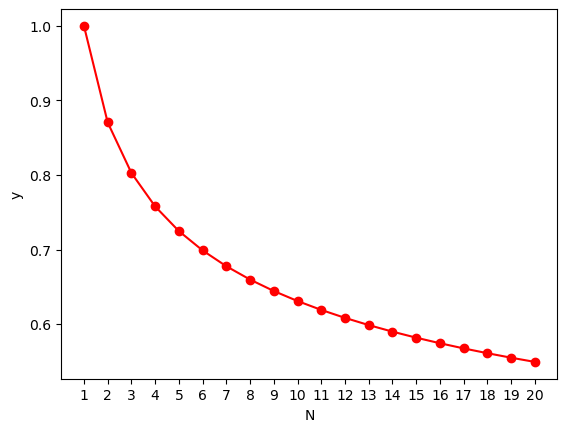

In [2]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#make a quick plot
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()


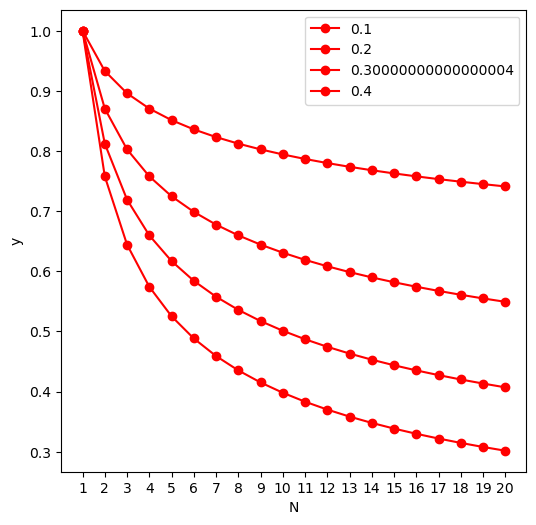

In [3]:
y = dict()
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = np.arange(0.1,0.4,0.1)
for j in range(len(b)):
    y[j] = a*N**(-b[j])
#make a quick plot
plt.figure(figsize = (6,6))
for j in range(len(b)):
    plt.plot(N,y[j],'ro-',label = b[j])
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.legend()
plt.show()

## Exponential Function 

### $$ y = ae^{-b(N-1)} $$

### Here y is a behavioral measure like response time, N indexes the trials starting at 1. 
### a,b,c are the **parameters** of the model. 
### Note that in an exponential model, N-1 is needed, so that a still captures the starting value.  




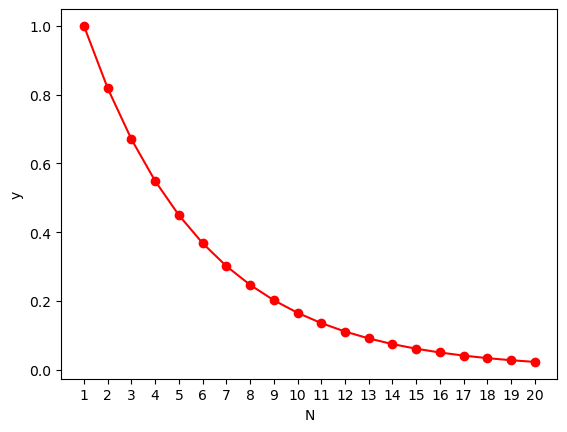

In [4]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*np.exp(-b*(N-1))
#make a quick plot
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()

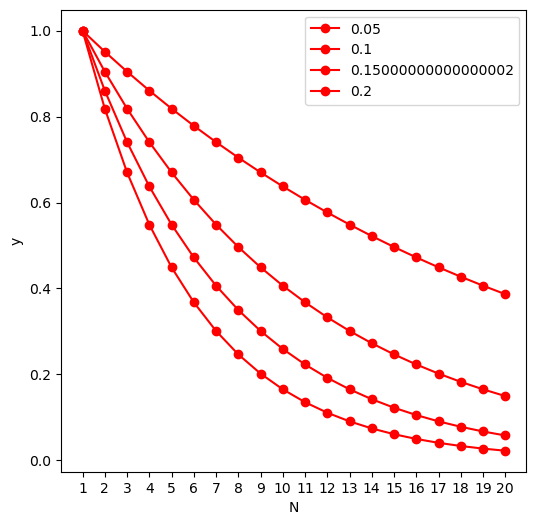

In [5]:
y = dict()
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = np.arange(0.05,0.25,0.05)
for j in range(len(b)):
    y[j] = a*np.exp(-b[j]*(N-1))
#make a quick plot
plt.figure(figsize = (6,6))
for j in range(len(b)):
    plt.plot(N,y[j],'ro-',label = b[j])
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.legend()
plt.show()

### Example: Power Law of Practice: Repealed?  

### Across a large variety of psychological experiments, 
* ####  simple reaction time
* ####  choice reaction time 
* ####  digit span
* ####  match to sample
#### ....
### the power law of practice came into wide use, because it provided a useful way to capture how people improved performance with practice. 
###  In 2000, a paper was published, 
#### Heathcote, A., Brown, S., & Mewhort, D. J. K. (2000). The power law repealed: The case for an exponential law of practice. Psychonomic Bulletin & Review, 7(2), 185-207.
### which showed that previous studies all used aggregated data across subjects in fitting a power law, and that individual subject data was better fit by an exponential law. 

### Why does this matter? 

### The two laws capture different ideas about learning.  Consider the m and m + 1 trial under each law. 

### Power Law 

$$ y[m] = am^{-b} $$
$$ y[m+1] = a(m+1)^{-b} $$

$$ y[m+1]/y[m] = \frac{m+1}{m}^{-b} $$

### Exponential Law 

$$ y[m] = ae^{-b(m-1)} $$
$$ y[m+1] = ae^{-bm} $$

$$ y[m+1]/y[m] = e^{-b}$$

### In the Power Law, the amount of change in the function y (learning) decreases as the number of trials (N) increases.
### In the Exponential Law, the amount of change in the function y (learning) is a constant.   

## Fitting Power Functions with a Linear Model

### $$ y = aN^{-b} $$

### $$ log(y) = log(a) -b*log(N) $$

### A log transform is your friend 

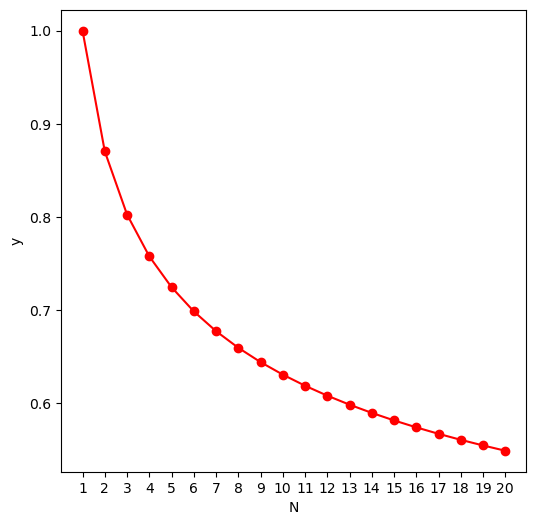

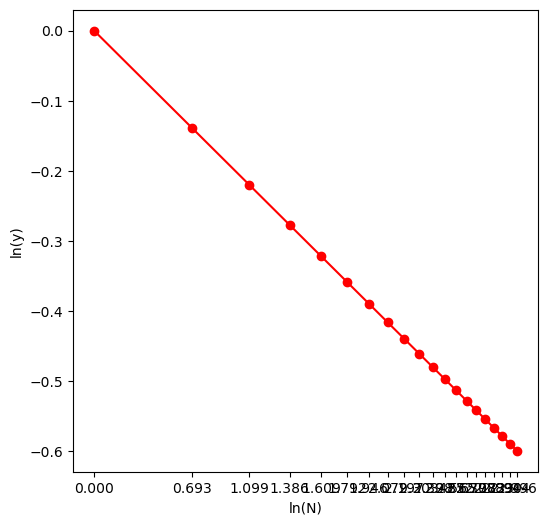

In [6]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#make a quick plot
plt.figure(figsize = (6,6))
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()
#log transform 
ylog = np.log(y)
Nlog = np.log(N)
plt.figure(figsize = (6,6))
plt.plot(Nlog,ylog,'ro-')
plt.xlabel('ln(N)')
plt.xticks(Nlog)
plt.ylabel('ln(y)')
plt.show()

## Fitting Exponential Functions with a Linear Model

### $$ y = ae^{-b(N-1)} $$

### $$ log(y) = log(a) -b*(N-1) $$

### A log transform is your friend 

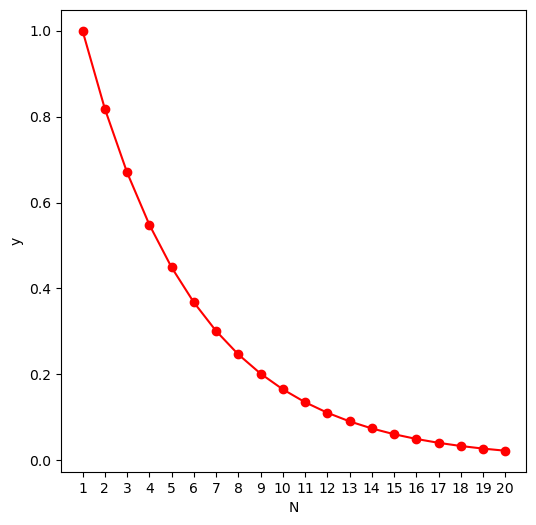

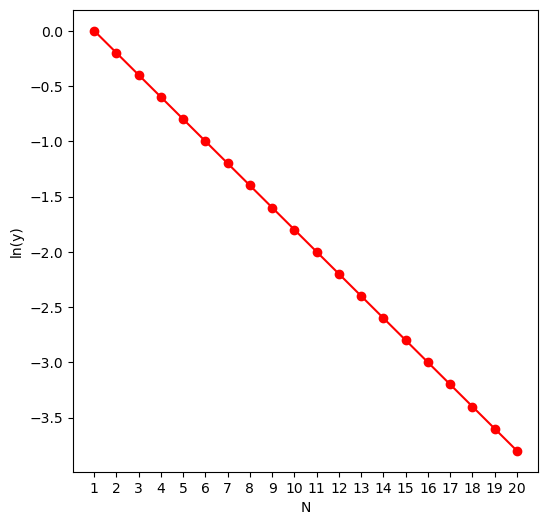

In [7]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*np.exp(-b*(N-1))
#make a quick plot
plt.figure(figsize = (6,6))
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()
#log transform 
ylog = np.log(y)
plt.figure(figsize = (6,6))
plt.plot(N,ylog,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('ln(y)')
plt.show()

## Fitting the Power Law 
### Using a Linear Regression Model 

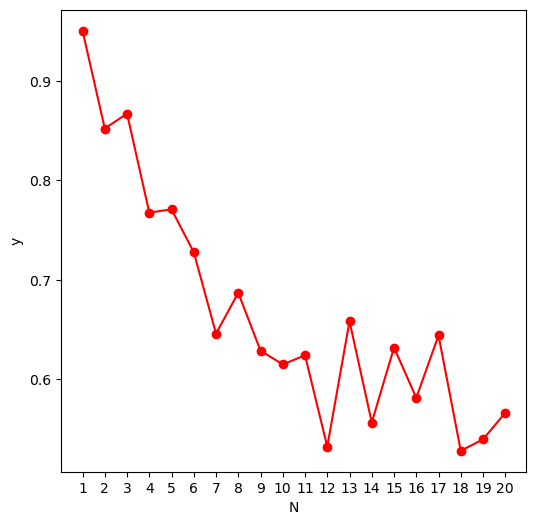

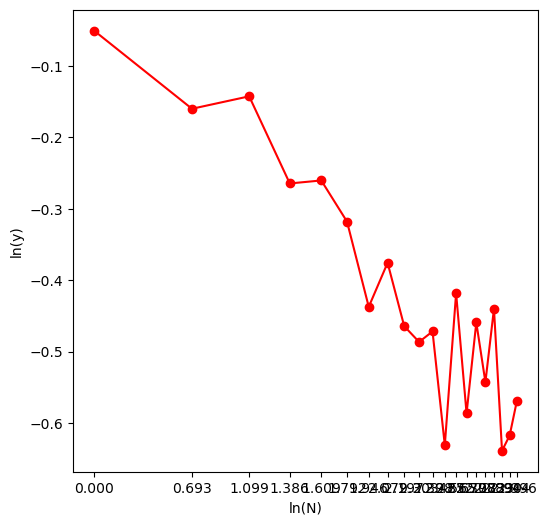

In [8]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#noise 
noise_std = 0.05
noise = rng.normal(0,noise_std,20)  #When we add noise, usually it makes the most sense to have it have a mean of 0.  
y = y+noise
#make a quick plot
plt.figure(figsize = (6,6))
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()
#log transform 
ylog = np.log(y)
Nlog = np.log(N)
plt.figure(figsize = (6,6))
plt.plot(Nlog,ylog,'ro-')
plt.xlabel('ln(N)')
plt.xticks(Nlog)
plt.ylabel('ln(y)')
plt.show()

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Nlog,ylog)
a_estimate= np.exp(intercept)
b_estimate = -slope
rsquared = r_value**2

### The logarithm is your friend in data exploration.  

## Nonlinear Functions and Least Squares 

### Linear, Exponential, and Power law models all have the advantage that they can be re-expressed as linear models, and easily fit using linear regression. 

### But, we often encounter many other types of models in Psychology and Neuroscience that cannot be easily fit with linear model methods

### In perception, and neuroscience, the ubiquitous model is the sigmoid function

In [10]:
def sigmoid(params, x):
    '''
    params: is a list or numpy array containing two parameters
    x: are the model inputs
    '''
    p0 = params[0] #SLOPE OF SIGMOID
    p1 = params[1] #MEAN OF SIGMOID
    y = 1/(1+np.exp(-p0*(x-p1)))
    return y 

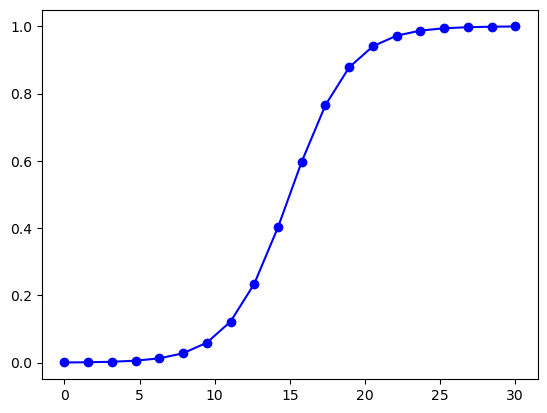

In [11]:

N = 20
x = np.linspace(0,30,N) 
true_parameters = [0.5,15] #SLOPE AND MEAN
y = sigmoid(true_parameters,x)
plt.figure() 
plt.plot(x,y,'bo-',label = 'true')


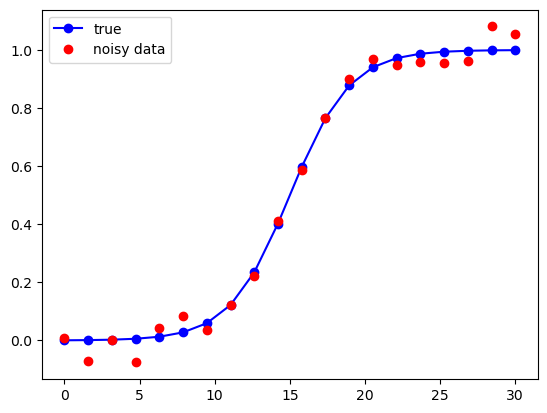

In [12]:
sdnoise = 0.05 
ydata = y + np.random.normal(0,sdnoise,N)
plt.plot(x,y,'bo-',label = 'true')
plt.plot(x,ydata,'ro',label='noisy data')
plt.legend()
plt.show()

In [13]:
def rmse(params,x,data):
    yhat = sigmoid(params, x)
    error = np.sqrt(np.mean((data-yhat)**2))
    return error

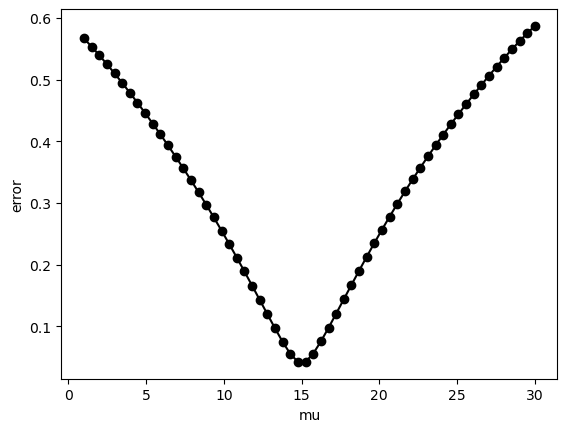

In [14]:
mumat = np.linspace(1,30,60) #DIFFERENT POSSIBLE VALUES OF MU
error = np.zeros(60)
for j in range(60):
    error[j] = rmse([0.5,mumat[j]],x,ydata) #COMPUTE ERRORS FOR DIFFERENT VALUES OF MU
plt.figure()
plt.plot(mumat,error,'ko-')
plt.xlabel('mu')
plt.ylabel('error')
plt.show()


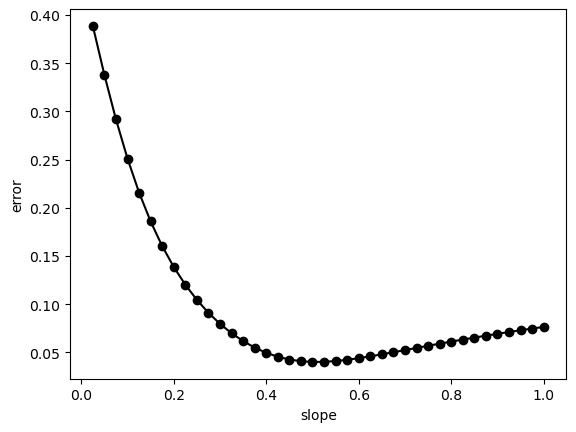

In [15]:
#FOR SLOPE ONLY 
slopemat = np.linspace(0.025,1,40) #DIFFERENT VALUES OF SLOPE
error = np.zeros(40)
for j in range(40):
    error[j] = rmse([slopemat[j],15],x,ydata) #COMPUTE ERRORS FOR DIFFERENT VALUES OF SLOPE
plt.figure()
plt.plot(slopemat,error,'ko-')
plt.xlabel('slope')
plt.ylabel('error')
plt.show()

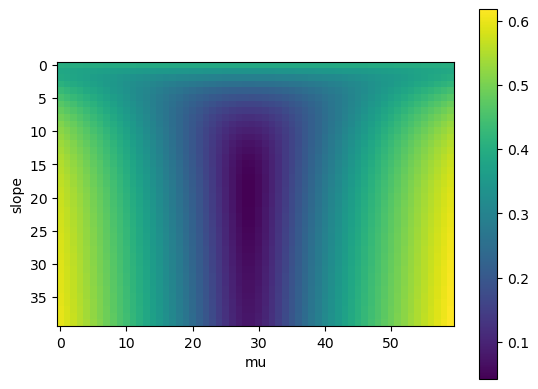

In [21]:
#FOR BOTH SLOPE AND MEAN 
error2 = np.zeros((40,60))
for j in range(40):
    for k in range(60):
        error2[j,k] = rmse([slopemat[j],mumat[k]],x,ydata) #COMPUTE ERRORS FOR BOTH
plt.figure()
plt.imshow(error2) 
plt.xlabel('mu')
plt.ylabel('slope')
plt.colorbar()
plt.show()